In [260]:
import pandas as pd
import numpy as np
import os
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [261]:
def load_csv(file_name):
    df=pd.read_csv(file_name)
    return df
file_name='../Data/combined_with_classification_2.csv'
fashion_df=load_csv(file_name)
copy=fashion_df.copy()

In [262]:
#calculate the bad images and reviews with ratio
#set lable according to the threshold 

def calculate_bad_items_ratio():
    copy['Bad images ratio']=((copy['1 Star Images']*5)+(copy['2 Stars Images']*4)+(copy['3 Stars Images']*3))/((copy['1 Star Images']*5)+(copy['2 Stars Images']*4)+(copy['3 Stars Images']*3)+(copy['4 Stars Images']*2)+(copy['5 Stars Images']))
    copy['Bad Reviews ratio']=((copy['1 Star Reviews']*5)+(copy['2 Stars Reviews']*4)+(copy['3 Stars Reviews']*3))/((copy['1 Star Reviews']*5)+(copy['2 Stars Reviews']*4)+(copy['3 Stars Reviews']*3)+(copy['4 Stars Reviews']*2)+(copy['5 Stars Reviews']))
    copy['Classification']=(copy['Bad Reviews ratio']<=0.30) & (copy['Bad images ratio']<=0.30)
    copy['Classification']=copy['Classification'].astype(int)
calculate_bad_items_ratio()

In [263]:
#deleate the columns that we used to calculate the lable
col_list=['Bad Reviews ratio','Bad images ratio','1 Star Images','2 Stars Images','3 Stars Images','4 Stars Images','5 Stars Images','Reviews Num','1 Star Reviews','2 Stars Reviews','3 Stars Reviews','4 Stars Reviews','5 Stars Reviews']
copy.drop(axis=1, index=None, columns=col_list, inplace=True)


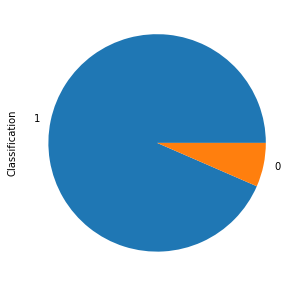

In [264]:
plt.figure(figsize = (10,5))
copy['Classification'].value_counts().plot(kind='pie')

In [265]:
#down sampling to create more balanced data
downsampling_copy=copy[copy['Classification']==1].head(1800).copy()
downsampling_copy=downsampling_copy.append(copy[copy['Classification']==0],ignore_index=False)
copy=downsampling_copy.copy()


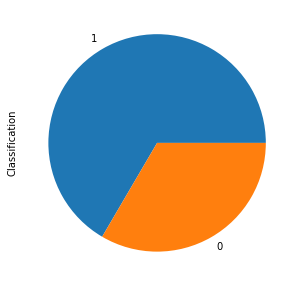

In [266]:
plt.figure(figsize = (10,5))
copy['Classification'].value_counts().plot(kind='pie')


In [267]:
#remove colors with low frequency.
val = copy['Color'].value_counts()
y = val[val < 30].index
copy['Color'] =  copy['Color'].replace({x:'other' for x in y})
copy['Color'].nunique()

#remove style type with low frequency.
val = copy['Style'].value_counts()
y = val[val < 30].index
copy['Style'] =  copy['Style'].replace({x:'other' for x in y})
copy['Style'].nunique()


10

In [268]:
def one_dim_plot(sr,plot_type,axis):
    return(sr.plot(kind=plot_type,ax=axis))

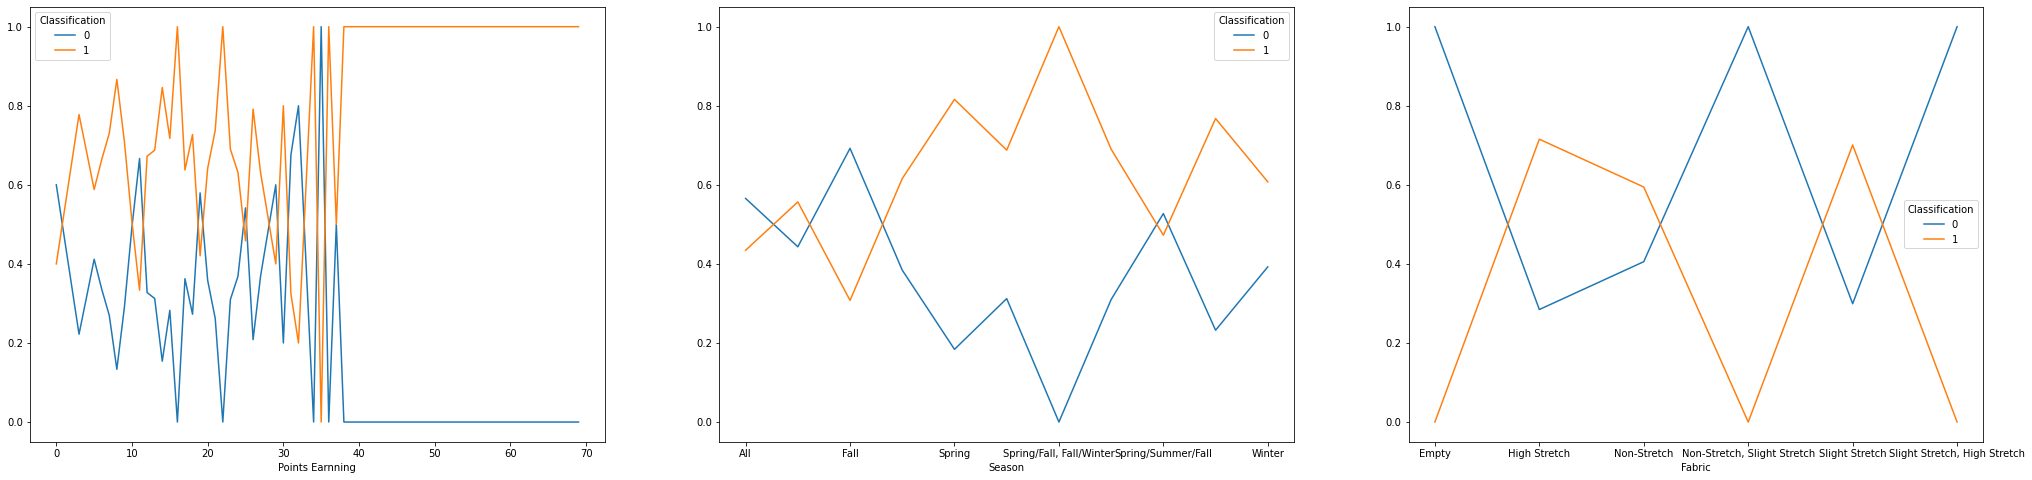

In [269]:
def plot_crosstab(df,col_names,other_col_name):
    axis=len(col_names)
    fig,axes=plt.subplots(1,axis,figsize=(35,8))
    for index in range(len(col_names)):
        c1=pd.crosstab(df[col_names[index]],df[other_col_name],normalize='index')
        one_dim_plot(c1,'line',axes[index])
        
col_names=['Points Earnning','Season','Fabric']
other_col_name='Classification'
plot_crosstab(copy,col_names,other_col_name)

Text(0.5, 1.0, 'Color')

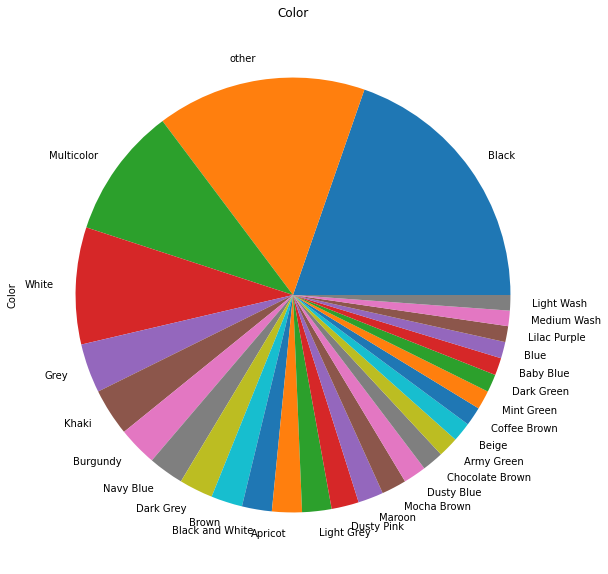

In [270]:
plt.figure(figsize = (15,10))
copy['Color'].value_counts().plot(kind='pie')
plt.title('Color')


Text(0.5, 1.0, 'Style')

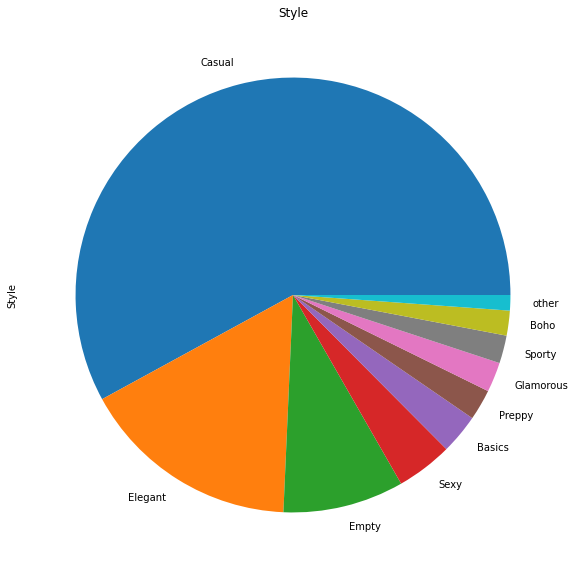

In [271]:
plt.figure(figsize = (10,10))
copy['Style'].value_counts().plot(kind='pie')
plt.title('Style')


In [272]:
def find_string_cols(df):
    list_cols=[]
    for col in df.columns: 
        if((df[col].dtype=='object') and (col not in ['SKU','Item Name','Details'])):
            list_cols.append(col)
    return list_cols

In [273]:
def encode_string_cols(df,list_cols):
    le = preprocessing.LabelEncoder()

    for col in list_cols:
        df[col].fillna("Empty", inplace=True)
        df[col] = le.fit_transform(df[col])
    return df,le

In [205]:
copy,le=encode_string_cols(copy,find_string_cols(copy))

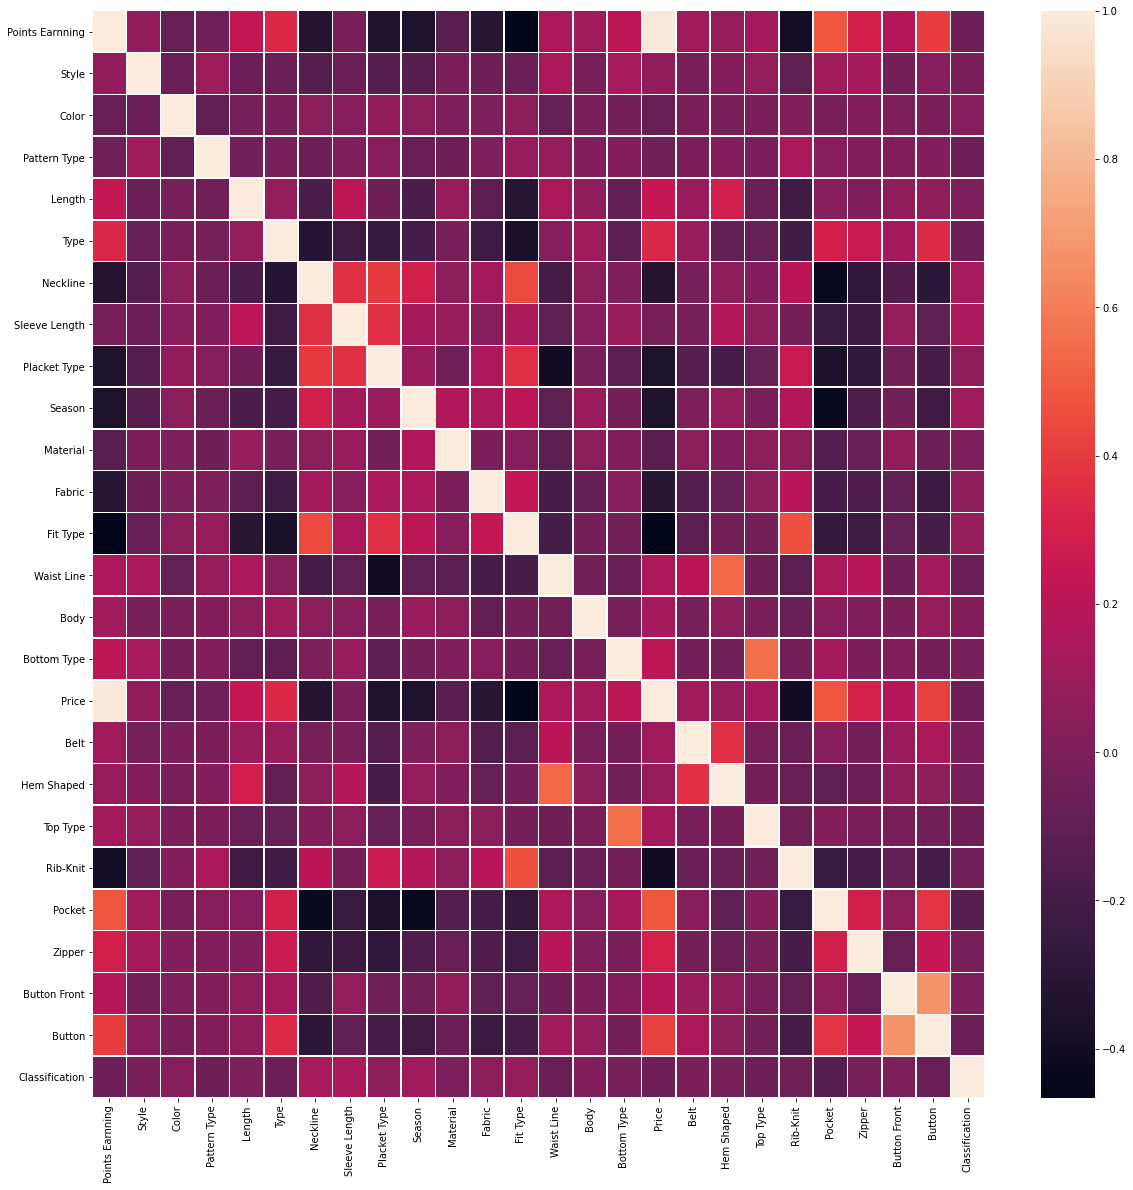

In [211]:
#Heat map 
copy2 = pd.DataFrame(copy, columns = ['Points Earnning', 'Style', 'Color', 
                                      'Pattern Type', 'Length','Type', 'Neckline',
                                      'Sleeve Length',  'Placket Type',
                                        'Season', 'Material', 'Fabric',  'Fit Type',
                                        'Waist Line', 'Body', 'Bottom Type', 'Price', 
                                        'Belt', 'Hem Shaped', 'Top Type', 'Rib-Knit', 'Pocket', 'Zipper',
                                        'Button Front',  'Button','Classification'])
plt.figure(figsize = (20,20))
ax = sns.heatmap(copy2.corr(), linewidth=0.5 )
plt.show()




In [145]:
#save results table 
copy.to_csv( "SheinData.csv", index=False, encoding='utf-8-sig')